In [194]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from itertools import combinations
from math import acos, cos, sin

plt.rcParams["figure.figsize"] = (15,10)
plt.rcParams.update({'font.size': 12})

In [85]:
class Cfg:
    TRAIN_PATH = './data/train.csv'

In [245]:
df = pd.read_csv(Cfg.TRAIN_PATH)
print(f'Total data number: {len(df)}')
print(df.head())

SyntaxError: invalid syntax (3463270214.py, line 4)

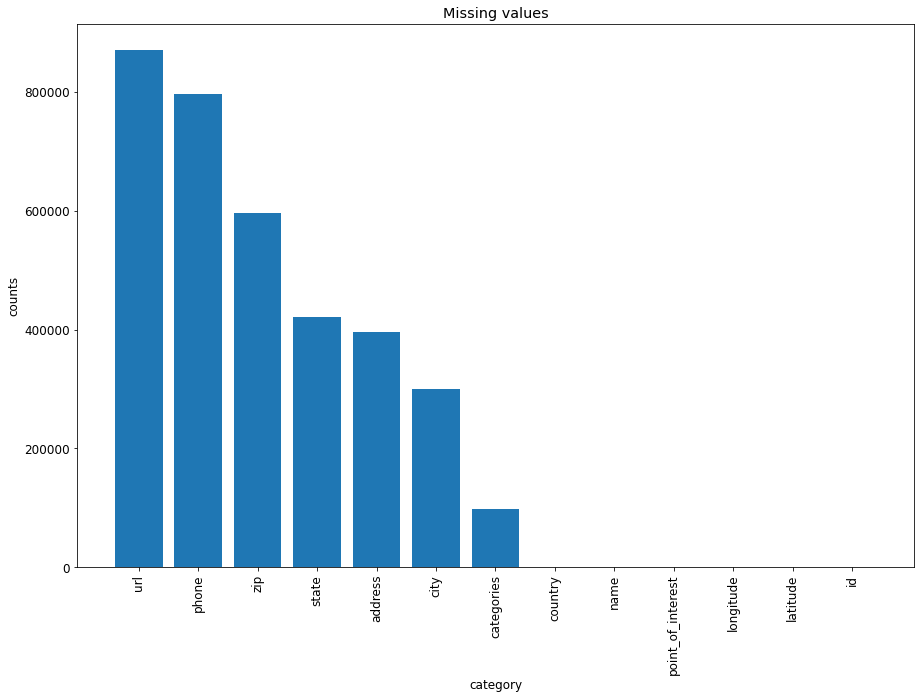

In [87]:
nan_counts = []
for col in df.columns:
    nan_counts.append(df[col].isnull().sum())
sort_tuples = zip(*sorted(zip(nan_counts, df.columns), reverse=True))
sort_counts, sort_columns = [list(s_tuple) for s_tuple in sort_tuples]
plt.bar(sort_columns, sort_counts)
plt.title('Missing values')
plt.xlabel('category')
plt.ylabel('counts')
plt.xticks(rotation=90)
plt.savefig('./analysis/missing_value.png', facecolor='white', bbox_inches='tight')
plt.show()

In [95]:
cat_counts = []
categories = df.categories.dropna().unique()
print(f'Category count: {len(categories)}')

Category count: 52578


100%|██████████| 52578/52578 [36:39<00:00, 23.91it/s]
/tmp/ipykernel_31798/1022524604.py:9: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  plt.xticks([])


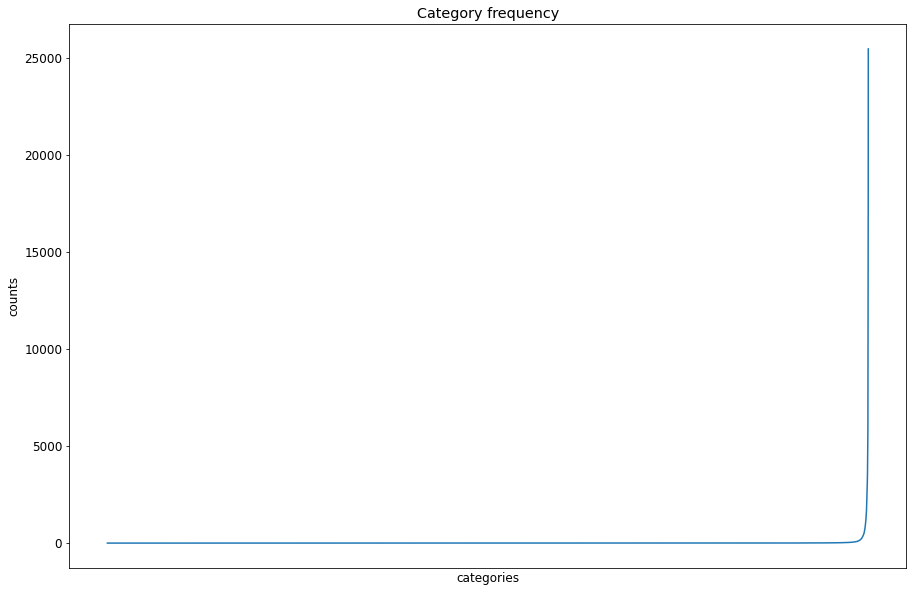

In [96]:
for cat in tqdm(categories):
    cat_counts.append(len(df[df.categories == cat]))
sort_tuples = zip(*sorted(zip(cat_counts, categories)))
sort_counts, sort_columns = [list(s_tuple) for s_tuple in sort_tuples]
plt.plot(sort_columns, sort_counts)
plt.title('Category frequency')
plt.xlabel('categories')
plt.ylabel('counts')
plt.xticks([])
plt.savefig('./analysis/category_count.png', facecolor='white', bbox_inches='tight')
plt.show()

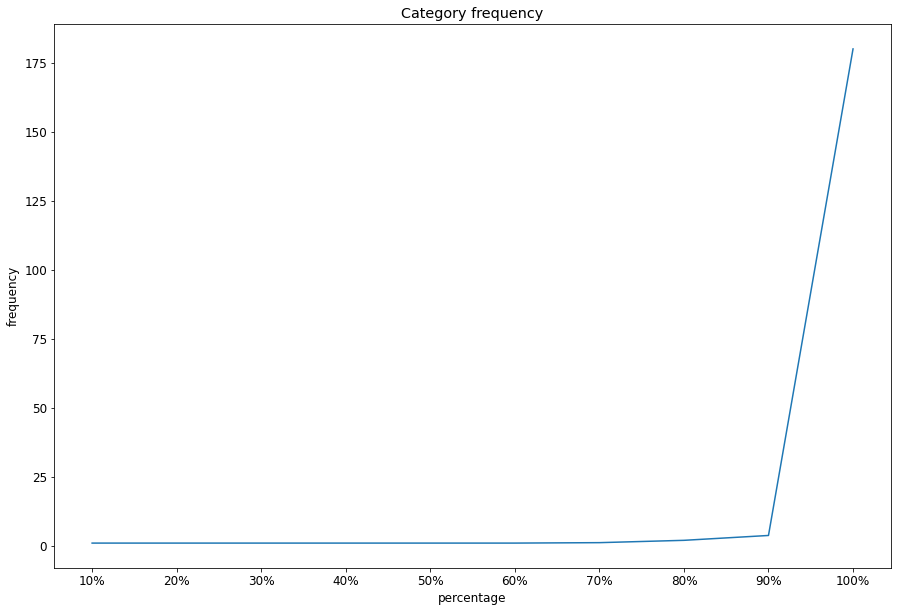

In [101]:
pct_10 = int(len(sort_counts) / 10)
mean_list = [np.mean(sort_counts[pct_10 * i: -1 if i == 9 else pct_10 * (i+1)]) for i in range(10)]
plt.plot([f'{(i+1)*10}%' for i in range(10)], mean_list)
plt.title('Category frequency')
plt.xlabel('percentage')
plt.ylabel('frequency')
plt.savefig('./analysis/category_frequency.png', facecolor='white', bbox_inches='tight')
plt.show()

In [163]:
poi_gb = df.groupby(by=['point_of_interest'])
poi_freq = poi_gb.size()
poi_freq_gb = pd.DataFrame(poi_freq, columns=['freq']).groupby(by=['freq'])
freq_statistical = poi_freq_gb.size()

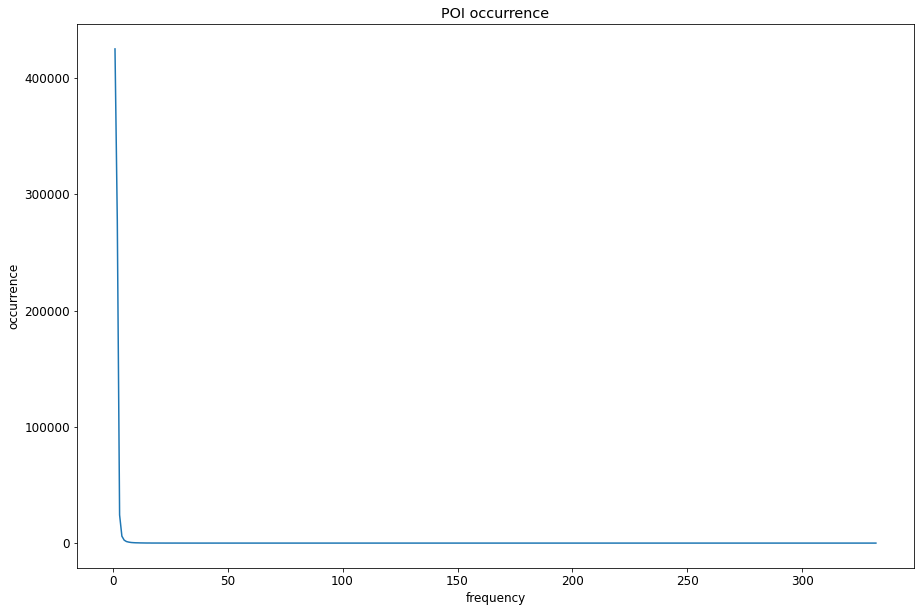

In [147]:
plt.plot(freq_statistical.index, freq_statistical)
plt.title('POI occurrence')
plt.xlabel('frequency')
plt.ylabel('occurrence')
plt.savefig('./analysis/POI_occurrence.png', facecolor='white', bbox_inches='tight')
plt.show()

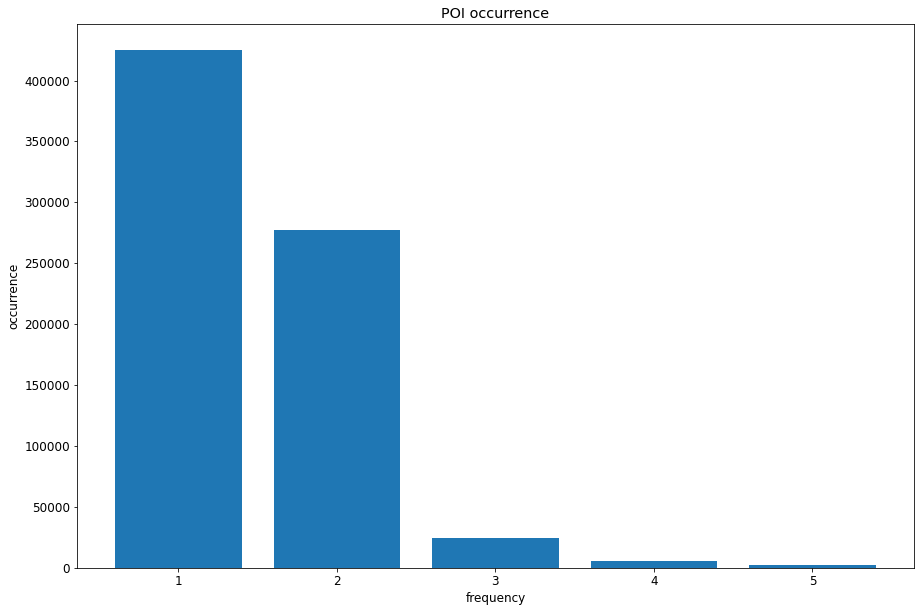

In [148]:
plt.bar(freq_statistical.index[:5], freq_statistical[:5])
plt.title('POI occurrence')
plt.xlabel('frequency')
plt.ylabel('occurrence')
plt.savefig('./analysis/Top-5_POI_occurrence.png', facecolor='white', bbox_inches='tight')
plt.show()

In [217]:
def geodesic_distance(pair1, pair2):
    latitude1, longitude1 = pair1
    latitude2, longitude2 = pair2
    r = 6371
    c = np.clip(sin(latitude1) * sin(latitude2) * cos(longitude1 - longitude2) + cos(latitude1) * cos(latitude2), -1, 1)
    d = r * acos(c) * np.pi / 180
    return d

In [219]:
poi_distance_list = []
for poi in tqdm(df.point_of_interest.unique()):
    single_poi = poi_gb.get_group(poi)
    latitudes = single_poi.latitude
    longitudes = single_poi.longitude
    coords = list(zip(latitudes, longitudes))
    combs = combinations(coords, 2)
    for comb in combs:
        poi_distance_list.append(geodesic_distance(comb[0], comb[1]))

100%|██████████| 739972/739972 [01:47<00:00, 6872.95it/s]


Total same POI distance: 950503


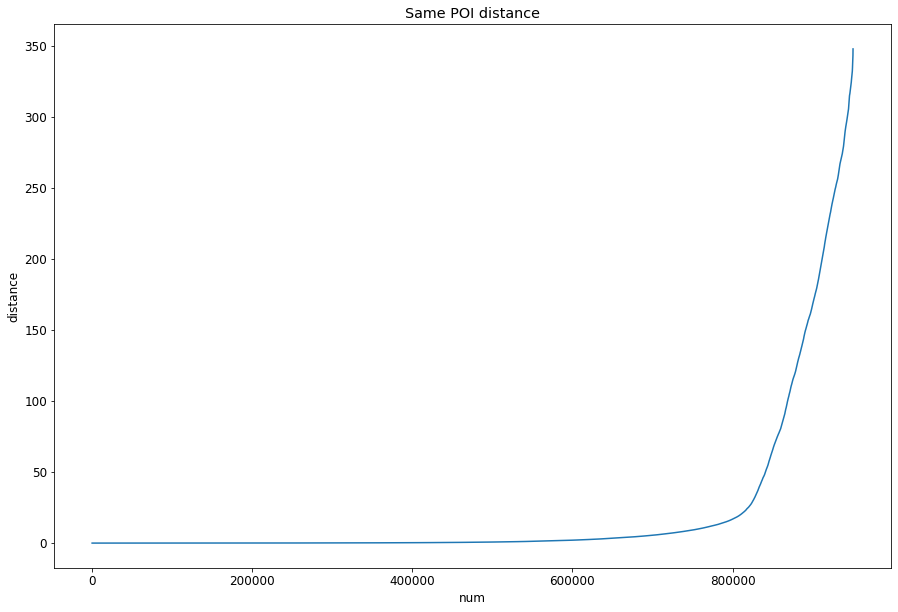

In [225]:
print(f'Total same POI distance: {len(poi_distance_list)}')
poi_distance_list = sorted(poi_distance_list)
plt.plot(range(len(poi_distance_list)), poi_distance_list)
plt.title('Same POI distance')
plt.xlabel('num')
plt.ylabel('distance')
plt.savefig('./analysis/Same_POI_distance.png', facecolor='white', bbox_inches='tight')
plt.show()

In [232]:
poi_same_city_list = []
for poi in tqdm(df.point_of_interest.unique()):
    single_poi = poi_gb.get_group(poi)
    cities = single_poi.city
    combs = list(combinations(cities, 2))
    for comb in combs:
        poi_same_city_list.append(comb[0] == comb[1])

100%|██████████| 739972/739972 [01:16<00:00, 9686.10it/s] 


Total same POI city: 950503


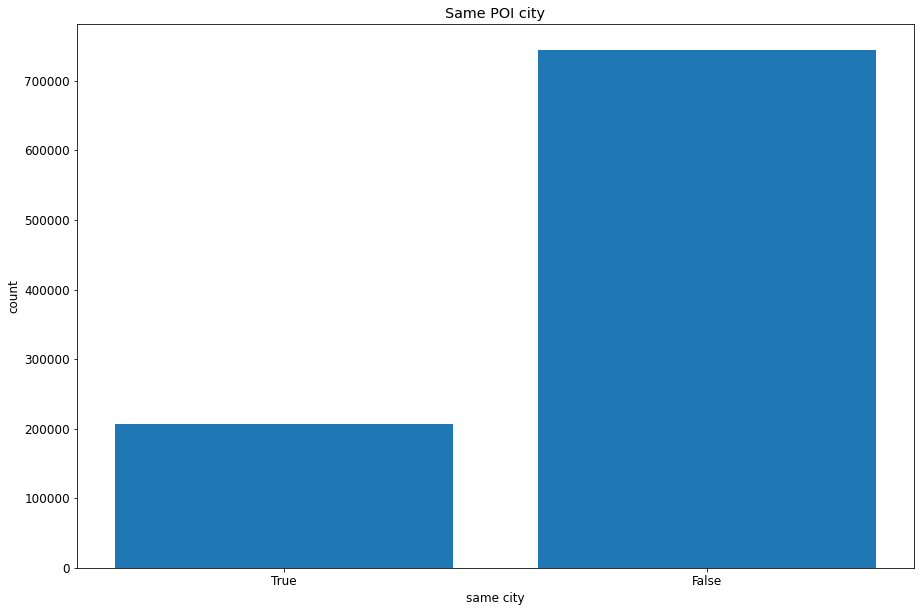

In [240]:
print(f'Total same POI city: {len(poi_same_city_list)}')
count_same_city = [sum(poi_same_city_list), len(poi_same_city_list) - sum(poi_same_city_list)]
plt.bar(['True', 'False'], count_same_city)
plt.title('Same POI city')
plt.xlabel('same city')
plt.ylabel('count')
plt.savefig('./analysis/same_POI_city.png', facecolor='white', bbox_inches='tight')
plt.show()

In [237]:
poi_same_country_list = []
for poi in tqdm(df.point_of_interest.unique()):
    single_poi = poi_gb.get_group(poi)
    countries = single_poi.country
    combs = list(combinations(countries, 2))
    for comb in combs:
        poi_same_country_list.append(comb[0] == comb[1])

100%|██████████| 739972/739972 [01:12<00:00, 10266.59it/s]


Total same POI country: 950503


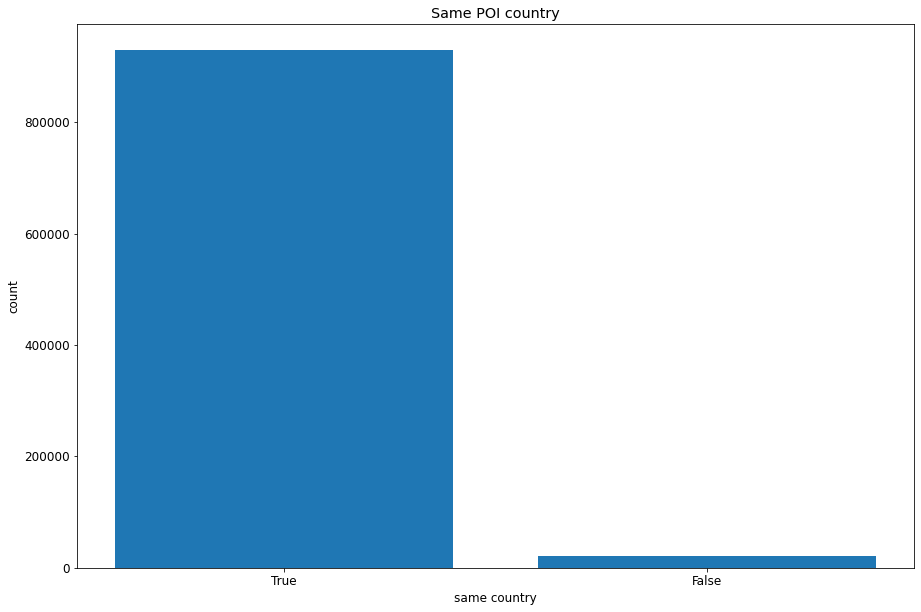

In [239]:
print(f'Total same POI country: {len(poi_same_country_list)}')
count_same_country = [sum(poi_same_country_list), len(poi_same_country_list) - sum(poi_same_country_list)]
plt.bar(['True', 'False'], count_same_country)
plt.title('Same POI country')
plt.xlabel('same country')
plt.ylabel('count')
plt.savefig('./analysis/same_POI_country.png', facecolor='white', bbox_inches='tight')
plt.show()

In [241]:
poi_same_zip_list = []
for poi in tqdm(df.point_of_interest.unique()):
    single_poi = poi_gb.get_group(poi)
    zips = single_poi.zip
    combs = list(combinations(zips, 2))
    for comb in combs:
        poi_same_zip_list.append(comb[0] == comb[1])

100%|██████████| 739972/739972 [01:16<00:00, 9675.93it/s] 


Total same POI zip: 950503


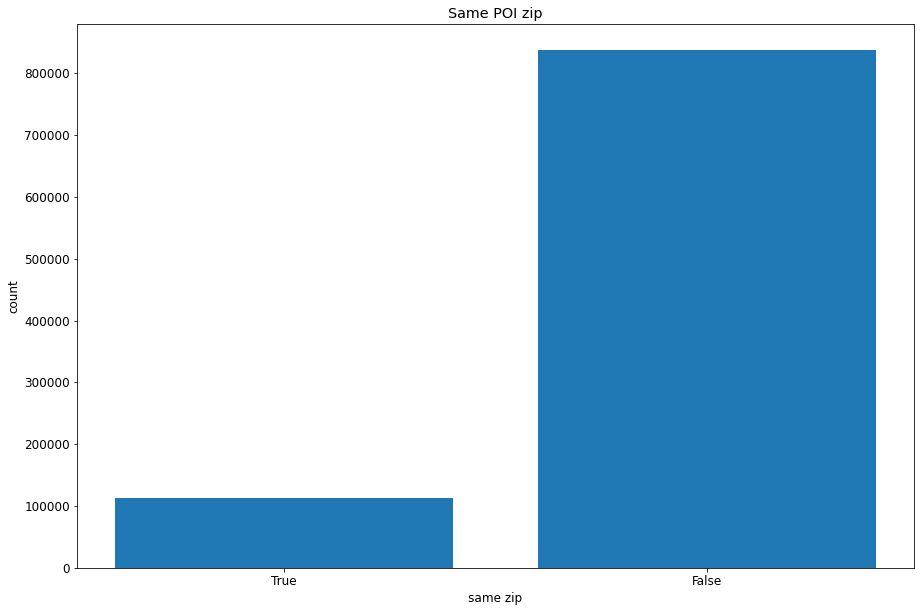

In [242]:
print(f'Total same POI zip: {len(poi_same_zip_list)}')
count_same_zip = [sum(poi_same_zip_list), len(poi_same_zip_list) - sum(poi_same_zip_list)]
plt.bar(['True', 'False'], count_same_zip)
plt.title('Same POI zip')
plt.xlabel('same zip')
plt.ylabel('count')
plt.savefig('./analysis/same_POI_zip.png', facecolor='white', bbox_inches='tight')
plt.show()

In [243]:
poi_same_state_list = []
for poi in tqdm(df.point_of_interest.unique()):
    single_poi = poi_gb.get_group(poi)
    states = single_poi.state
    combs = list(combinations(states, 2))
    for comb in combs:
        poi_same_state_list.append(comb[0] == comb[1])

100%|██████████| 739972/739972 [01:08<00:00, 10764.41it/s]


Total same POI state: 950503


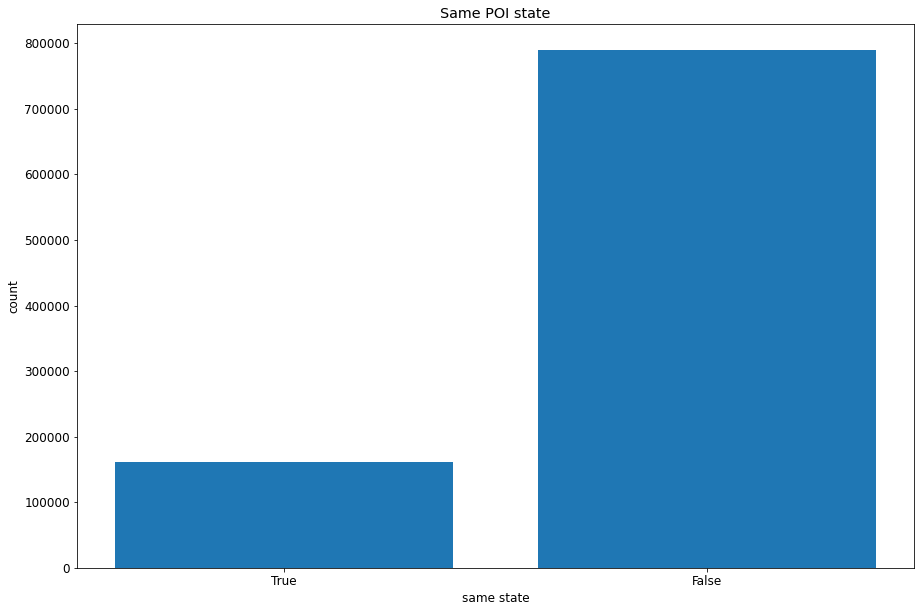

In [244]:
print(f'Total same POI state: {len(poi_same_state_list)}')
count_same_state = [sum(poi_same_state_list), len(poi_same_state_list) - sum(poi_same_state_list)]
plt.bar(['True', 'False'], count_same_state)
plt.title('Same POI state')
plt.xlabel('same state')
plt.ylabel('count')
plt.savefig('./analysis/same_POI_state.png', facecolor='white', bbox_inches='tight')
plt.show()